## UrbanSound8K Dataset

Librosa is a Python library used for analyzing and processing audio signals, particularly music and speech. It provides a wide range of tools for audio manipulation, including loading audio files, computing spectrograms, extracting features, and more. It is especially popular in the fields of music information retrieval (MIR) and speech processing.

Here are some key features of Librosa:

1. Audio Loading and Saving: Librosa can load audio files in various formats and allows you to save processed audio data.

2. Feature Extraction: It provides methods to extract various audio features, such as Mel-frequency cepstral coefficients (MFCCs), chroma features, spectral contrast, and more.

3. Time-Frequency Analysis: Librosa can compute and manipulate time-frequency representations like Short-Time Fourier Transform (STFT), Mel spectrograms, and Constant-Q Transform (CQT).

4. Tempo and Beat Tracking: The library includes functions for detecting tempo, beats, and onset events in audio signals.

5. Pitch and Harmonic Analysis: Librosa offers tools for pitch estimation, harmonic-percussive source separation, and tuning analysis.

6. Visualization: It provides built-in functions to visualize audio data, such as waveforms, spectrograms, and chromagrams.

7. Resampling: Librosa can resample audio signals to different sampling rates.

Librosa is widely used in academic research, audio signal processing, and machine learning applications related to audio data. It is known for being user-friendly and well-documented, making it a go-to library for many audio analysis tasks in Python.

In [268]:
#!pip install librosa

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load/Read an Audio File

### Librosa internally uses the audioread package, which can handle various formats like .mp3, .wav, .ogg, etc., depending on the backend installed on your system.

### So yes, .mp3 files are fully supported, and you can use them in the same way as .wav files for loading, processing, and analysis.

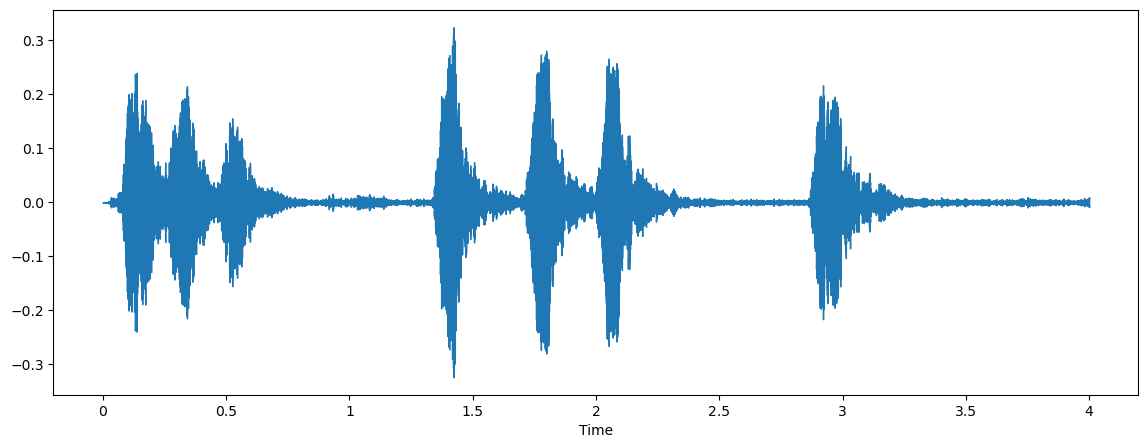

In [270]:
### Dog Sound
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

filename = 'Dog_Bark.wav'
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
## For Showing the Waveform of the Signal
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)




In [271]:
print(sample_rate)

22050


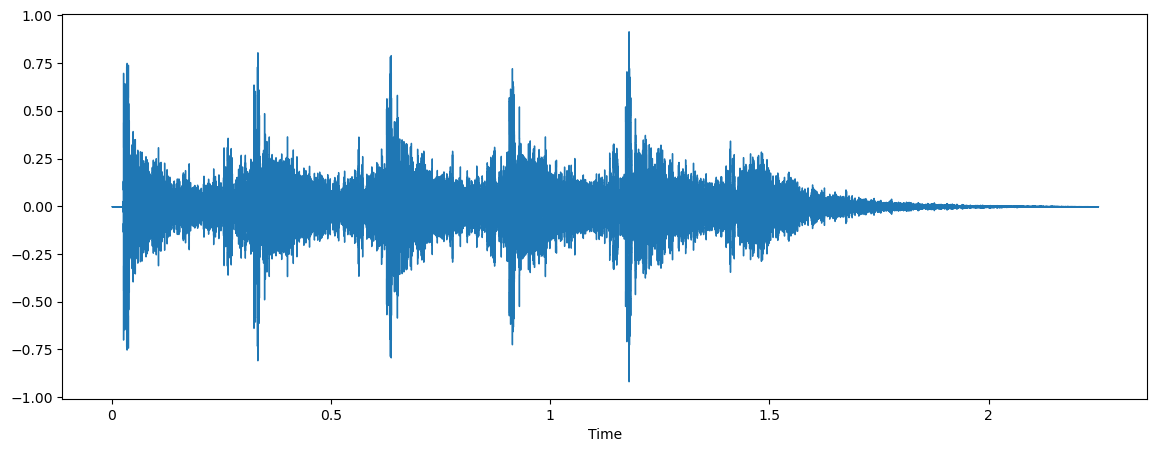

In [272]:
### GUN Shot Sount
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

filename = 'Gun_Shot.wav'
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
## For Showing the Waveform of the Signal
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)


In [273]:
print(sample_rate)

22050


### Use "scipy" Library to load an Audio

In [274]:
from scipy.io import wavfile as wav
filename = 'Gun_Shot.wav'
wave_sample_rate, wave_audio=wav.read(filename)

In [275]:
wave_sample_rate

44100

If the wave_audio array has two channels, it means the audio file is in stereo format. In a stereo audio file, there are two separate audio channels:

1. Left channel: Contains the audio information intended for the left speaker.

2. Right channel: Contains the audio information intended for the right speaker.

Each channel will have its own set of audio data, and together they create a more immersive listening experience with a sense of direction and space.

When you load a stereo .wav file, the resulting wave_audio array will have two dimensions:

1. The first dimension represents the time (samples).

2. The second dimension represents the channels (with columns for left and right).

In [276]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

### Left Channel

In [277]:
wave_audio[0:,0]

array([0, 0, 0, ..., 1, 1, 0], dtype=int16)

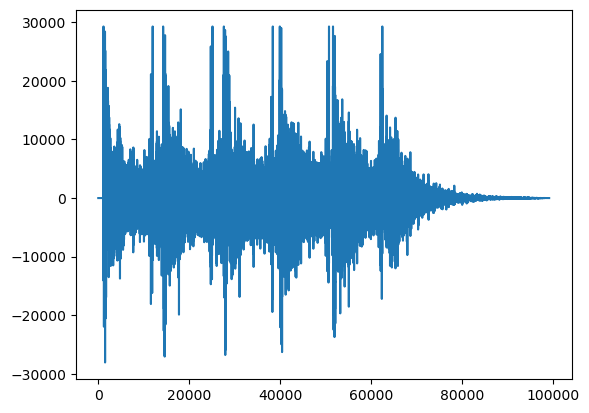

In [278]:
plt.plot(wave_audio[0:,0])

### Right Channel

In [279]:
wave_audio[0:,1]

array([0, 0, 0, ..., 0, 1, 0], dtype=int16)

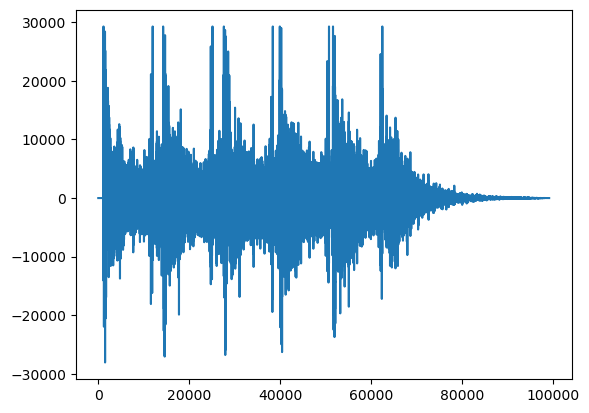

In [280]:
plt.plot(wave_audio[0:,0])

Or, if you want to convert the stereo file to mono (combining both channels), you could average them:

In [281]:
mono_audio = wave_audio.mean(axis=1)
mono_audio

array([0. , 0. , 0. , ..., 0.5, 1. , 0. ])

Or, if you want to convert the stereo file to mono (combining both channels), you could average them:

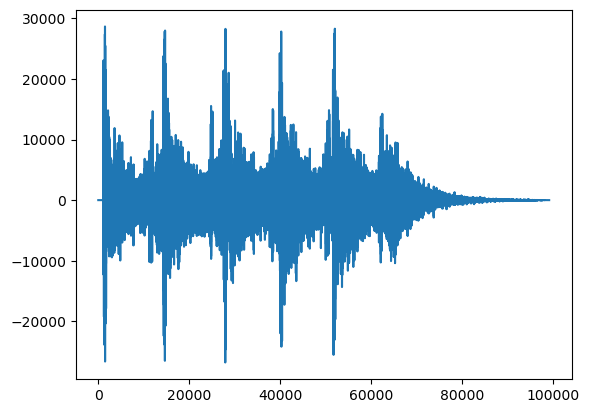

In [282]:
plt.plot(mono_audio)

#### Normalized Value obtain from "Librosa"

In [283]:
## Normalized Value
data

array([-7.4505806e-09,  2.9802322e-08,  4.8428774e-08, ...,
        1.0127544e-05,  2.3271263e-05,  7.0009992e-06], dtype=float32)

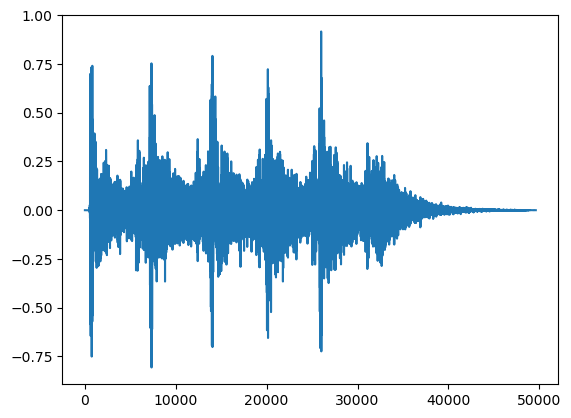

In [284]:
plt.plot(data)

### Note

When you use librosa.load() to load an audio file, it defaults to converting the audio to mono by averaging all channels. This behavior simplifies working with the audio, especially for tasks where stereo separation is not needed, such as some machine learning applications.

If you want to preserve the original channels and load the audio as stereo using librosa, you can do so by setting the mono parameter to False:

import librosa

#### filename = 'Dog_Bark.wav'
#### wave_audio, wave_sample_rate = librosa.load(filename, sr=11025, mono=False)

If you load it this way, librosa will not automatically downmix the audio to mono, and you'll retain the original channel structure.

### Import Dataset

In [285]:
import pandas as pd

df=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [286]:
df.shape

(8732, 8)

In [287]:
### Check whether the dataset is imbalanced
df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

<Axes: xlabel='class'>

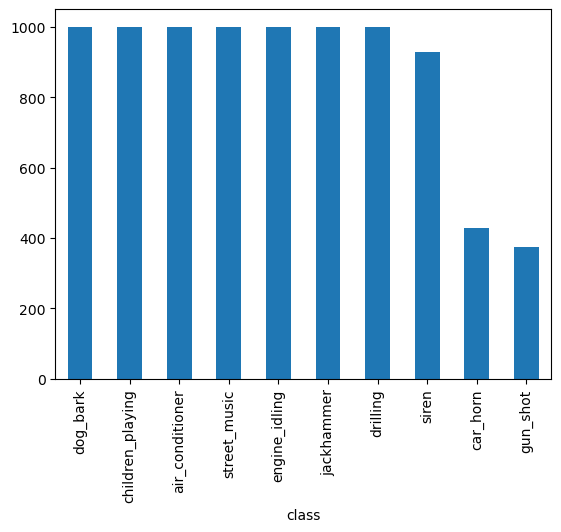

In [288]:
df['class'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

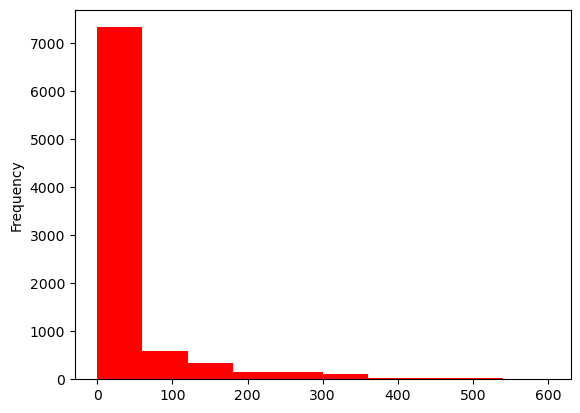

In [289]:
df['start'].plot(kind='hist',color='red')

<Axes: ylabel='Frequency'>

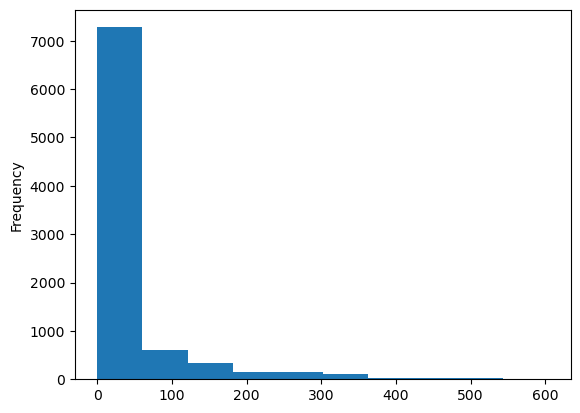

In [290]:
df['end'].plot(kind='hist')

### Audio Classification Data Preprocessing

In [291]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='100263-2-0-3.wav'
librosa_audio_data, librosa_sample_rate=librosa.load(audio_file_path)

In [292]:
librosa_sample_rate

22050

In [293]:
librosa_audio_data

array([ 0.00331575,  0.00467553,  0.00361099, ..., -0.00376796,
       -0.00347471, -0.00357828], dtype=float32)

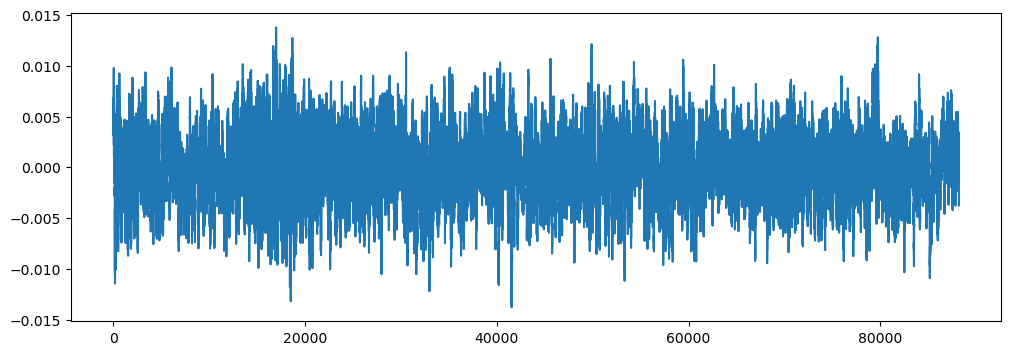

In [294]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

### Lets Load Audio using "scipy" Library

In [295]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [296]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

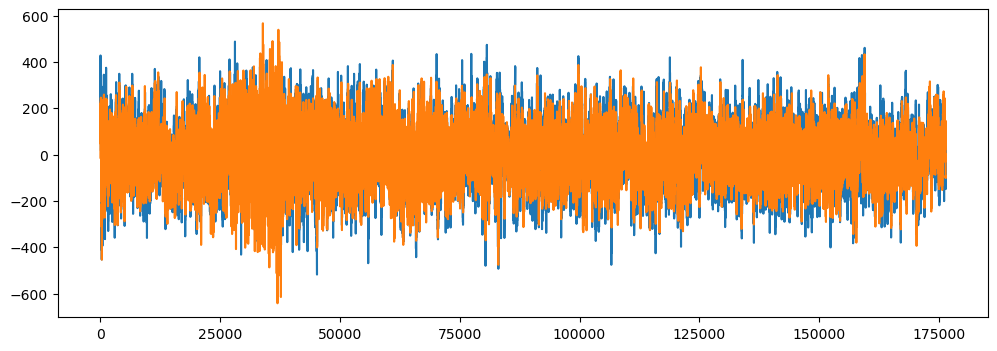

In [297]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

## Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

MFCC (Mel-Frequency Cepstral Coefficients) is a feature extraction technique widely used in audio processing and speech recognition. It is particularly effective for representing the spectral characteristics of audio signals, such as speech, in a compact and informative way.

MFCCs Shape:

Suppose mfccs has a shape of (n_mfcc, n_frames), where:

1. n_mfcc: is the number of MFCC coefficients (e.g., 40).

2. n_frames: is the number of time frames in the audio.

1. A shorter audio clip may have fewer frames, leading to a shape like (40, 120).

2. A longer audio clip may have more frames, resulting in a shape like (40, 300).

n_mfcc=40: means that the function will compute the first 40 MFCCs for each frame of the audio signal. MFCCs are a way to capture the characteristics of the audio in the frequency domain, with lower MFCCs capturing more general spectral information, and higher MFCCs capturing more detailed information.

1. 40 (rows):
This corresponds to the number of MFCC coefficients (n_mfcc=40). Each coefficient represents different aspects of the frequency spectrum of the audio signal.

2. 173 (columns):
This is the number of frames (or time windows) in the audio file. The audio signal is divided into short overlapping frames (typically 25ms long) for analysis. Each column represents the MFCC coefficients for one time frame of the audio. The exact number of frames depends on the length of the audio and how it’s divided into frames.

### What is the optimal number of MFCC coefficients?

### Trade-off Between Detail and Overfitting:

1. Using fewer coefficients (e.g., 12) can make your model simpler and help prevent overfitting, especially if you don't have much data.

2. Using more coefficients (e.g., 40) can improve model performance by capturing more nuances of the audio signal but increases the risk of overfitting if not handled carefully.

In [298]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [299]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259777e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760440e+00, -3.2479753e+00, -4.8965530e+00, ...,
        -5.2023673e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968404e-01, -5.8838761e-01, -8.1724095e-01, ...,
         1.8340671e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780632e+00,  6.9809496e-01,  6.3521605e+00, ...,
        -2.6221929e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

In [300]:
mfccs.T.shape

(173, 40)

In [301]:
import numpy as np
a=[[1,2,3],[7,8,9],[4,8,1]]
np.array(a)

array([[1, 2, 3],
       [7, 8, 9],
       [4, 8, 1]])

In [302]:
temp=pd.DataFrame(np.array(a),columns=['Col1','Col2','Col2'])
temp

,Col1,Col2,Col2
0,1,2,3
1,7,8,9
2,4,8,1


In [303]:
## Row Wise
np.mean(a,axis=0)

array([4.        , 6.        , 4.33333333])

In [304]:
## Col. Wise
np.mean(a,axis=1)

array([2.        , 8.        , 4.33333333])

In [305]:
## axis=0 for rows
import numpy as np
mfccs_scaled_features = np.mean(mfccs.T,axis=0)
mfccs_scaled_features

array([-4.5714639e+02,  1.0652766e+02, -1.9124525e+01,  3.9871788e+01,
        4.8239555e+00,  2.2051247e+01,  1.6051298e+01,  7.6270461e+00,
        6.4653568e+00,  5.7486687e+00, -2.0007887e+00,  9.2372990e+00,
        1.5500602e+00,  2.9796615e+00,  2.2389250e+00,  5.5386144e-01,
        6.8374723e-02,  6.2108431e+00,  1.6094936e-02,  3.8128395e+00,
       -9.2304015e-01,  2.9105923e+00, -1.1760967e+00,  3.3959277e+00,
       -3.5774214e+00,  1.7304532e-01, -2.6636205e+00, -8.3663851e-01,
       -1.9108851e+00,  1.6138260e+00, -1.1401570e-01,  5.8531183e-01,
       -2.4161274e+00,  2.7829313e+00, -3.2590985e+00,  4.3626833e-01,
       -1.8451543e+00, -3.9152598e-01, -3.7904031e+00,  2.2742145e+00],
      dtype=float32)

In [306]:
len(mfccs_scaled_features)

40

In [307]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [308]:
import numpy as np
def features_extractor(file_name):
    # Load the audio file
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

    # Extract MFCCs
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Calculate the mean of the MFCCs (you can customize this to extract other features)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [309]:
#!pip install resampy

In [310]:
import numpy as np
from tqdm import tqdm

### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    
    extracted_features.append([data,final_class_labels])

3554it [02:59, 20.80it/s]c:\Users\prana\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [06:53, 29.93it/s]c:\Users\prana\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\prana\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:11, 20.24it/s]


In [311]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [312]:
extracted_features_df['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [333]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [334]:
X.shape

(8732, 40)

In [335]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [336]:
### One Hot Encoding
# Assuming y is your original categorical data
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()

y = to_categorical(le.fit_transform(y))
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [337]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [338]:
X_train

array([[-8.80241013e+01,  1.15684669e+02, -9.68509293e+01, ...,
         2.10284591e+00,  5.68624210e+00, -4.03489542e+00],
       [-1.62190353e+02,  1.33891235e+02, -2.55662365e+01, ...,
        -3.12729955e+00, -4.14286900e+00,  9.90925074e-01],
       [-2.62374603e+02,  1.76690979e+02, -1.12590805e+02, ...,
         3.60265225e-01,  2.11163497e+00, -1.68925834e+00],
       ...,
       [-2.91092590e+02,  2.33220108e+02, -4.70138979e+00, ...,
         2.92341739e-01, -3.27010810e-01, -5.25230058e-02],
       [-2.00923096e+02,  9.21831055e+01, -7.96089706e+01, ...,
        -5.86358070e-01, -1.96598291e+00,  4.89708471e+00],
       [-2.70923004e+02,  1.34519638e+02, -7.87687111e+00, ...,
        -1.71547759e+00, -1.77560544e+00, -2.85965413e-01]], dtype=float32)

In [339]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [340]:
X_train.shape

(6985, 40)

In [341]:
## We have Total 10 Classes
y_train.shape

(6985, 10)

In [342]:
X_test.shape

(1747, 40)

In [343]:
## We have Total 10 Classes
y_test.shape

(1747, 10)

## Model Creation

In [327]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [344]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [345]:
### No of classes
num_labels=y.shape[1]
num_labels

10

In [376]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

# First layer
# "0.001"--> is regularization strength (e.g., 0.001 or 0.01) can be tuned based on your specific dataset and model performance.
model.add(Dense(120, input_shape=(40,), kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Second layer
model.add(Dense(250, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Third layer
model.add(Dense(120, kernel_regularizer=regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


c:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [377]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [378]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 120
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history= model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/120
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1621 - loss: 9.1467
Epoch 1: val_loss improved from inf to 2.38169, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1623 - loss: 9.0855 - val_accuracy: 0.2484 - val_loss: 2.3817
Epoch 2/120
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2545 - loss: 2.3979
Epoch 2: val_loss improved from 2.38169 to 2.10701, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2548 - loss: 2.3974 - val_accuracy: 0.3286 - val_loss: 2.1070
Epoch 3/120
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 2.2527
Epoch 3: val_loss improved from 2.10701 to 1.89573, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3137 - loss: 2.2464 - val_accuracy: 0.4167 - val_loss: 1.8957
Epoch 4/120
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3

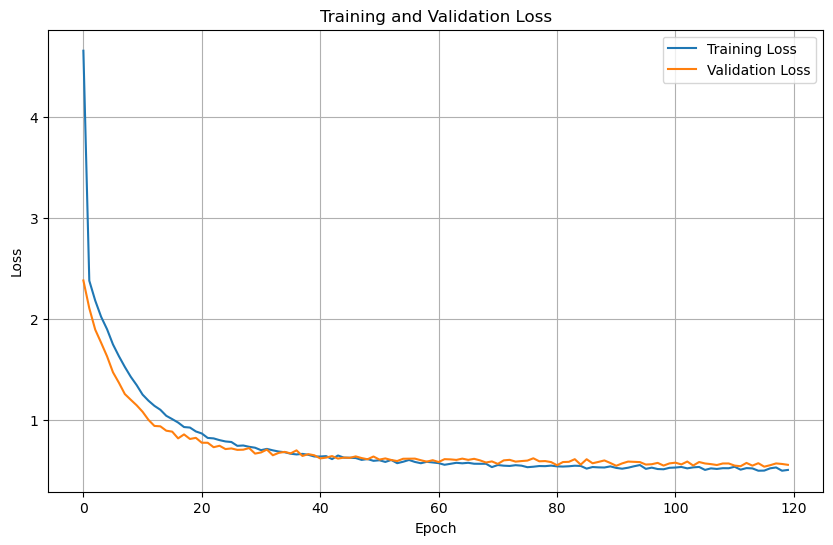

In [379]:
# Extract the loss and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

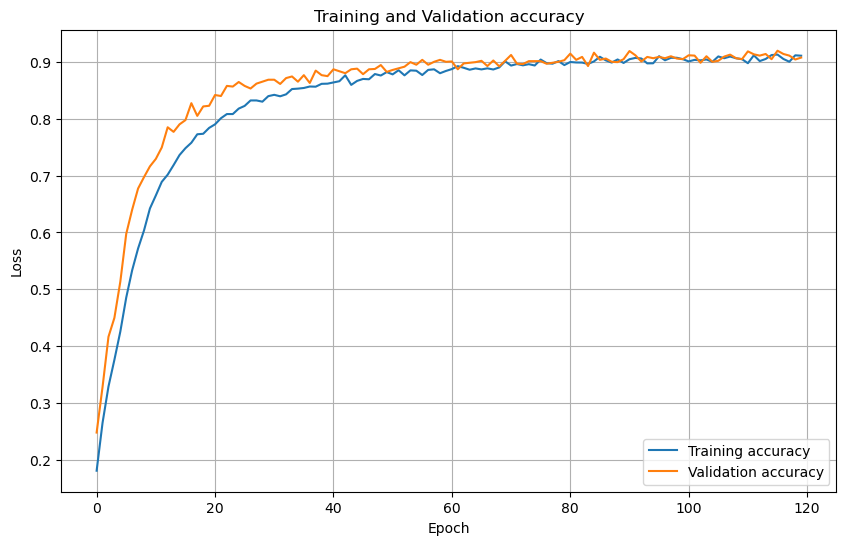

In [380]:
# Extract the loss and validation loss
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training accuracy')
plt.plot(val_loss, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [381]:
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9716535210609436


In [382]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9072695970535278


In [383]:
df.head(6)

,slice_file_name,fsID,start,end,salience,fold,classID,class,Combined
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,3 dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,2 children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,2 children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,2 children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,2 children_playing
5,100263-2-0-143.wav,100263,71.5,75.500000,1,5,2,children_playing,2 children_playing


In [385]:
import numpy as np
def features_extractor(file_name):
    # Load the audio file
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

    # Extract MFCCs
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Calculate the mean of the MFCCs (you can customize this to extract other features)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return np.array([mfccs_scaled_features])

In [386]:
def print_prediction(file_name):
    pred_fea = features_extractor(file_name) 
    pred_vector = np.argmax(model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n')

In [387]:
print_prediction('Dog_Bark.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The predicted class is: dog_bark 



In [388]:
print_prediction('Gun_Shot.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The predicted class is: gun_shot 



In [389]:
print_prediction('100263-2-0-3.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The predicted class is: children_playing 



In [390]:
print_prediction('UrbanSound8K/audio/fold5/100032-3-0-0.wav')

# Load the audio using librosa
audio_path = 'UrbanSound8K/audio/fold5/100032-3-0-0.wav'
audio_data, sample_rate = librosa.load(audio_path, sr=None)  # sr=None preserves the original sample rate

# Now play the audio using ipd.Audio
ipd.Audio(audio_data, rate=sample_rate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted class is: dog_bark 



In [391]:
print_prediction('UrbanSound8K/audio/fold7/99812-1-3-0.wav')

# Load the audio using librosa
audio_path = 'UrbanSound8K/audio/fold7/99812-1-3-0.wav'
audio_data, sample_rate = librosa.load(audio_path, sr=None)  # sr=None preserves the original sample rate

# Now play the audio using ipd.Audio
ipd.Audio(audio_data, rate=sample_rate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted class is: car_horn 



### Perform Prediction Using Saved Model

In [392]:
from tensorflow.keras.models import load_model

# Load the saved best model
best_model = load_model('saved_models/audio_classification.keras')

In [393]:
# Evaluate the model on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9222 - loss: 0.5388 
Test Loss: 0.5414168238639832
Test Accuracy: 0.9192901849746704


In [394]:
import numpy as np
def features_extractor(file_name):
    # Load the audio file
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

    # Extract MFCCs
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    # Calculate the mean of the MFCCs (you can customize this to extract other features)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return np.array([mfccs_scaled_features])

In [395]:
def print_prediction(file_name):
    pred_fea = features_extractor(file_name) 
    pred_vector = np.argmax(best_model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n')

In [396]:
print_prediction('Gun_Shot.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
The predicted class is: gun_shot 

